# **Compute Wavenumber Spectra from SWOT L3 Data**

### Project Overview 🌊

In this notebook, we present our project on calculating wavenumber spectra using SWOT L3 data. First, we installed the `widetrax` package and some necessary libraries. 📦

We used Level 3 Low-Resolution Sea Surface Height (L3_LR_SSH) data, organized in NetCDF files, which we uploaded to the ETIDO platform's storage space. 💾 This example specifically focuses on the Mediterranean region (0°-8°E, 35.5°N-43.5°N) 🌍


### Imports/Libraries 📦

In [13]:
import pyinterp
from widetrax import Spectram as sp
from widetrax import DataPreprocessing as dp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Required variables 🧮

In [14]:
#Med region
area = [0, 35.5, 8, 43.5]
start_date = '20230701'  # the desired start date in YYYYMMDD format
end_date = '20230930'  
resolution = 0.1

## 1. Research and extract data on the desired region and time period🌍

we extract the xarray datasets for the selected region of interest.

In [15]:
database_path = 'SWOT_data/'
matching_folders = dp.check_directory(database_path, start_date, end_date)
combined_datasets = dp.extract_xarrays_by_time(database_path, start_date, end_date, area)

In [16]:
combined_datasets[0]

<xarray.Dataset> Size: 1MB
Dimensions:    (num_lines: 471, num_pixels: 69)
Coordinates:
    latitude   (num_lines, num_pixels) float64 260kB 43.79 43.78 ... 35.27 35.26
    longitude  (num_lines, num_pixels) float64 260kB 2.667 2.643 ... 3.621 3.6
Dimensions without coordinates: num_lines, num_pixels
Data variables:
    mdt        (num_lines, num_pixels) float64 260kB dask.array<chunksize=(471, 69), meta=np.ndarray>
    ssha       (num_lines, num_pixels) float64 260kB dask.array<chunksize=(471, 69), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    time_coverage_begin:             2023-08-01T15:05:24Z
    time_coverage_end:               2023-08-01T15:56:50Z
    geospatial_lat_min:              -78.271903
    geospatial_lat_max:              78.272068
    geospatial_lon_min:              0.000145
    geospatial_lon_max:              359.999951

## 2. Count the number of observations per bin 🔢

We check and plot the data density in the selected region

In [ ]:
obs_count = dp.count_observations(combined_datasets, area, resolution)
#Plot
dp.plot_obs_count(obs_count, area, title='Number of observations')

## 3. Handling and Interpolating Potential NaN Values 🛠️

In [9]:
has_converged, filled_datasets = dp.fill_nan(combined_datasets)

## 4. Extract segments ✂️

In [10]:
%%time
segments_dict = sp.retrieve_segments(filled_datasets,FileType="NetCDF")

/opt/conda/lib/python3.12/site-packages/widetrax/Spectram.py:38: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for col in range(dataset.dims['num_pixels']):
/opt/conda/lib/python3.12/site-packages/widetrax/Spectram.py:38: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for col in range(dataset.dims['num_pixels']):
/opt/conda/lib/python3.12/site-packages/widetrax/Spectram.py:38: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths,

CPU times: user 8.72 s, sys: 274 ms, total: 8.99 s
Wall time: 9.18 s


## 5. Calculate the Power Number Spectra (**PSD**) 📊

In [11]:
psd_dict, freqs_dict = sp.calculate_psd(segments_dict)
# Calculate PSD Mean
psd_mean, freqs_mean = sp.psd_mean_and_freq(psd_dict,freqs_dict)

## 6. Plot 📉🖼️

/opt/conda/lib/python3.12/site-packages/widetrax/Spectram.py:221: RuntimeWarning: divide by zero encountered in divide
  ax2 = ax.secondary_xaxis("bottom", functions=(lambda x: 1 / x, lambda x: 1 / x))


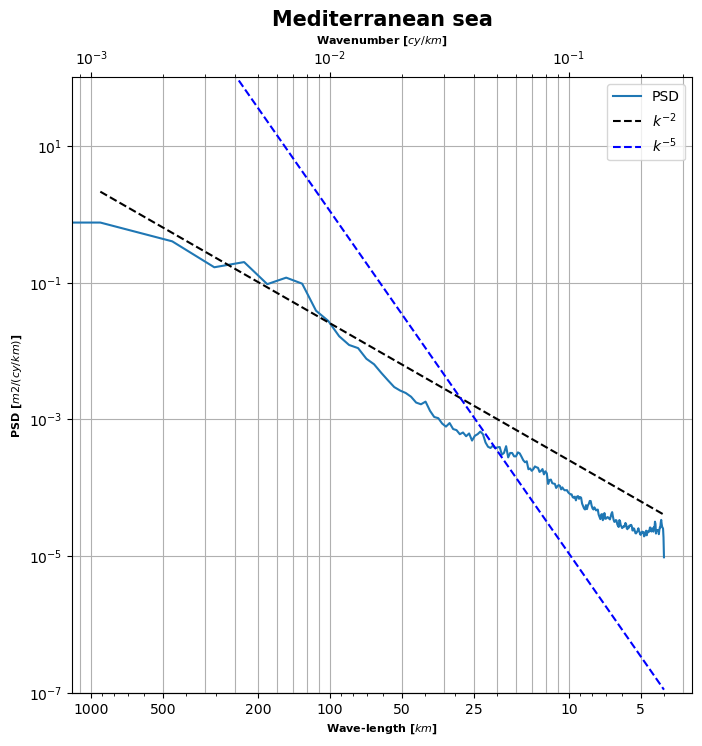

In [12]:
fig, ax_ = plt.subplots(1, 1, figsize=(8, 8))
# Plot PSD
title = 'Mediterranean sea'
sp.plot_psd(ax_, freqs_mean, psd_mean, unit = "m2",psd_labels="PSD",title=title)

### **Conclusion** ✅📜

- we successfully downloaded the SWOT data from Earthdata PODAAC.
- we found that only SSH L2 data was available.
- the `widetrax` package is designed to work with L3 data ==> As a result, many of the package's functions didn't perform as expected.

From this issue, two important takeaways can be highlighted:

1. **Adaptation of `widetrax` for L2 data**: It would be beneficial if the `widetrax` package could be adapted to also support L2 data, allowing for more flexibility in different data processing scenarios.
   
2. **Availability of SWOT data on the EDITO platform**: Having SWOT data available on the EDITO platform in the future would facilitate data access and streamline various processing workflows.
